In [1]:
import sys, os
sys.path.append('../src')
from NeutrinoFogFuncs import *
from NeutrinoFogPlotFuncs import *

In [2]:
import multiprocessing
from NeutrinoFuncs import BinnedNeutrinoRates, BinnedNeutrinoRates2
from WIMPFuncs import BinnedWIMPRate,MeanInverseSpeed_SHM,C_SI, BinnedWIMPRate2
from LabFuncs import FormFactorHelm
from Params import *
#==============================================================================#
ne = 50 # number of energy bins (anything >50 is accurate enough)
nm = 400 # number of mass points
m_vals = np.logspace(log10(0.1),log10(1.0e4),nm) # mass points
Flux_norm = NuFlux # See Params.py
Flux_err = NuUnc # See Params.py
E_th = 1.0e-4 # Threshold
E_max = 200.0 # Max recoil energy

Nuc = Xe131

R_sig = BinnedWIMPRate(E_th,E_max,ne,m_vals,Nuc,C_SI,FormFactorHelm,MeanInverseSpeed_SHM)
R_nu = BinnedNeutrinoRates(E_th,E_max,ne,Nuc,Flux_norm)

In [3]:
phi = 9.
fogDatGen1 = Fog(phiGen1)
fogDatGen2 = Fog(phiGen2)
#%time res1 = list(map(lambda x: fogDatGen1.sigmaExpoListGen2(1.0e-3, -50.1, x, R_nu, NuUnc, phi), R_sig))
#%time res2 = list(map(lambda x: fogDatGen2.sigmaExpoListGen(np.logspace(-3.,9.,130), x, R_nu, NuUnc, phi), R_sig))

In [4]:
%%time
pool = multiprocessing.Pool(4)
multiple_results = [pool.apply_async(\
        fogDatGen1.sigmaExpoListGen2, (1.0e-3, -50.1, x, R_nu, NuUnc, phi))\
                                     for x in R_sig]
pool.close()
pool.join()
res1= [res.get() for res in multiple_results]

CPU times: user 882 ms, sys: 147 ms, total: 1.03 s
Wall time: 11.2 s


For Method II, the numerical result would fail when the exposure is too large.
Thus, there are some fluctuations in our results, while we can neglect it as it reaches the systematic limit.

In [5]:
%%time
pool = multiprocessing.Pool(4)
multiple_results = [pool.apply_async(\
        fogDatGen2.sigmaExpoListGen, (np.logspace(-3.,9.,130), x, R_nu, NuUnc, phi))\
                                     for x in R_sig]
pool.close()
pool.join()
res2= [res.get() for res in multiple_results]

CPU times: user 1.19 s, sys: 110 ms, total: 1.3 s
Wall time: 13.8 s


In [6]:
nufloor1 = np.append([m_vals], np.transpose(np.array(list(map(findPoint, res1)))), axis=0)
nufloor2 = np.append([m_vals], np.transpose(np.array(list(map(findPoint, res2)))), axis=0)

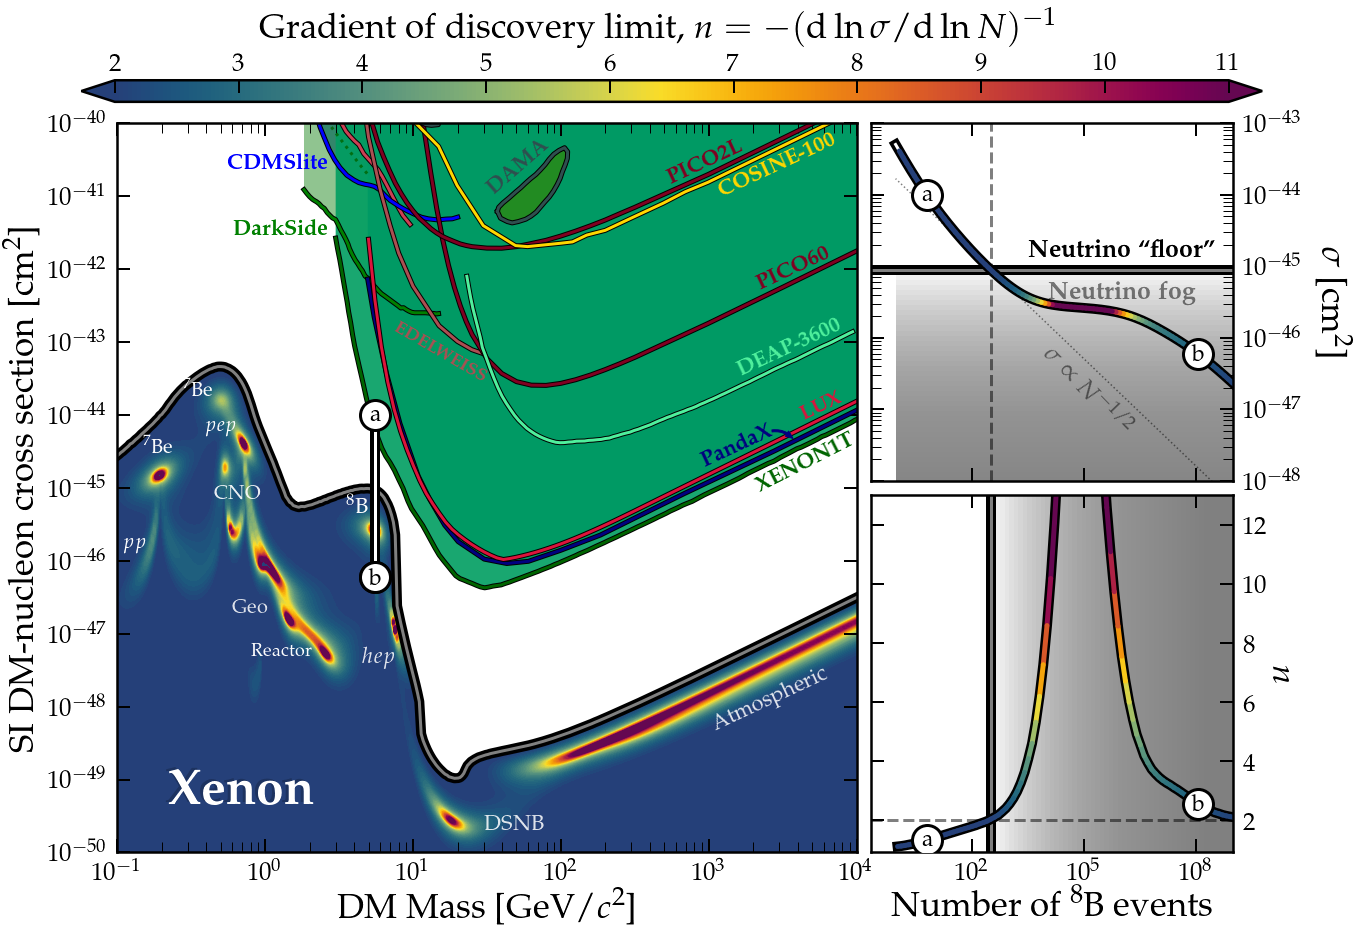

In [7]:
method1P1 = vFogPlot1(res1, m_vals, R_nu)

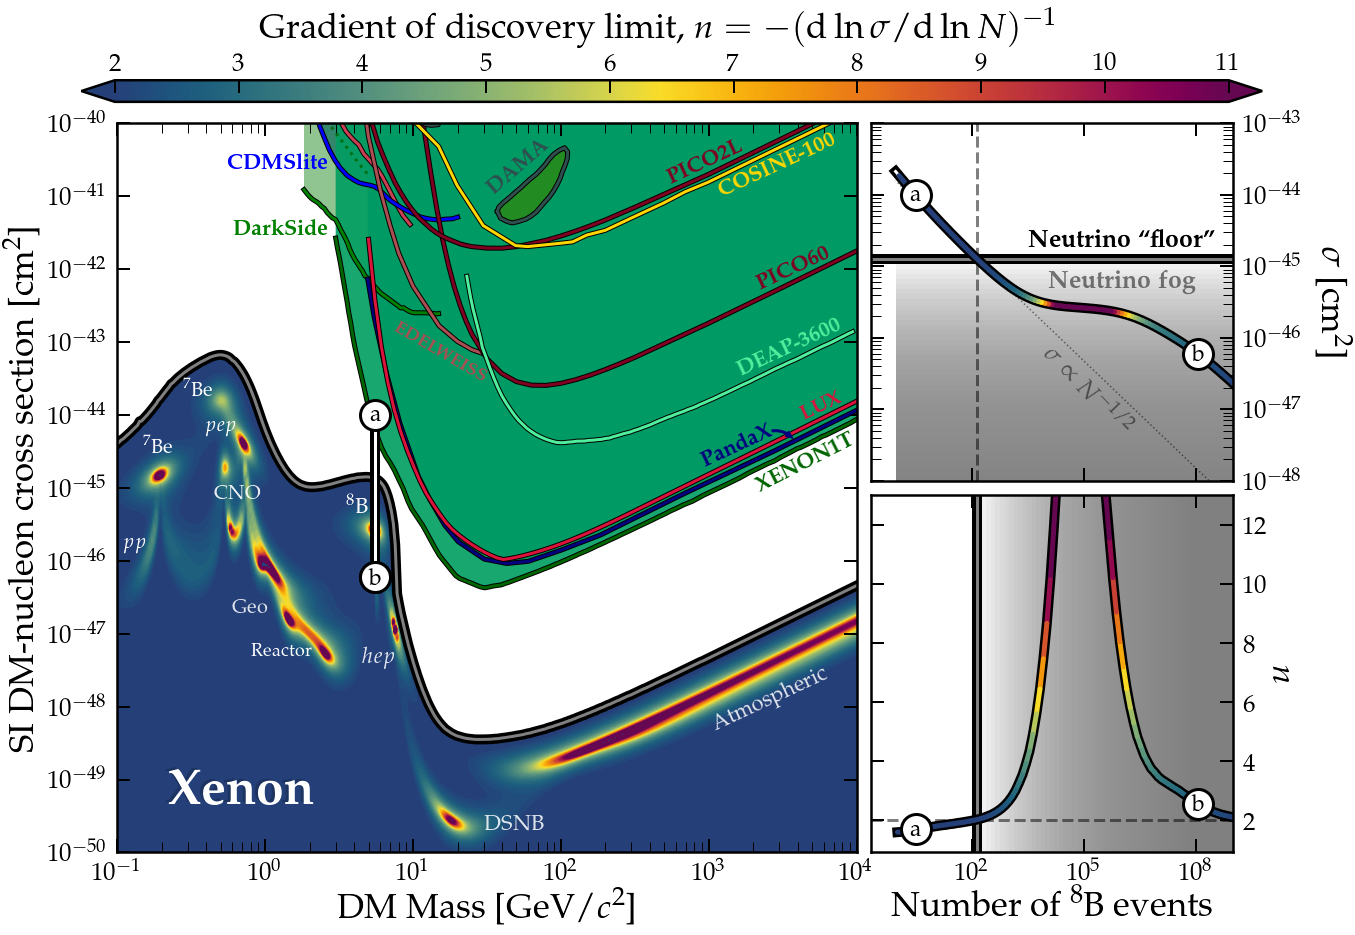

In [8]:
method2P1 = vFogPlot1(res2, m_vals, R_nu)

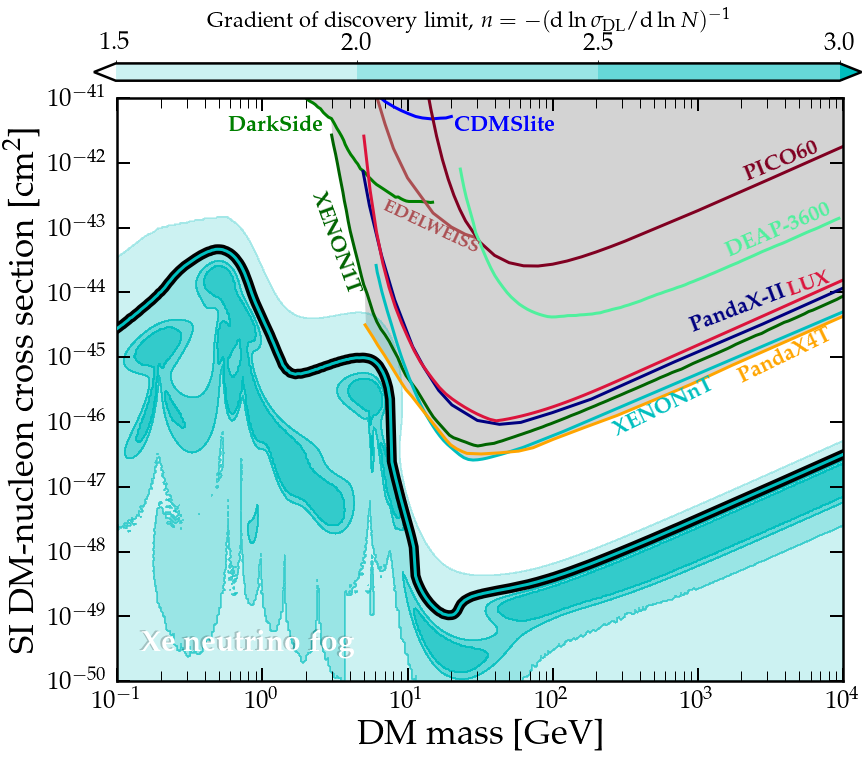

In [9]:
method1P2 = vFogPlot2(res1, m_vals, 'c', 'Xe')

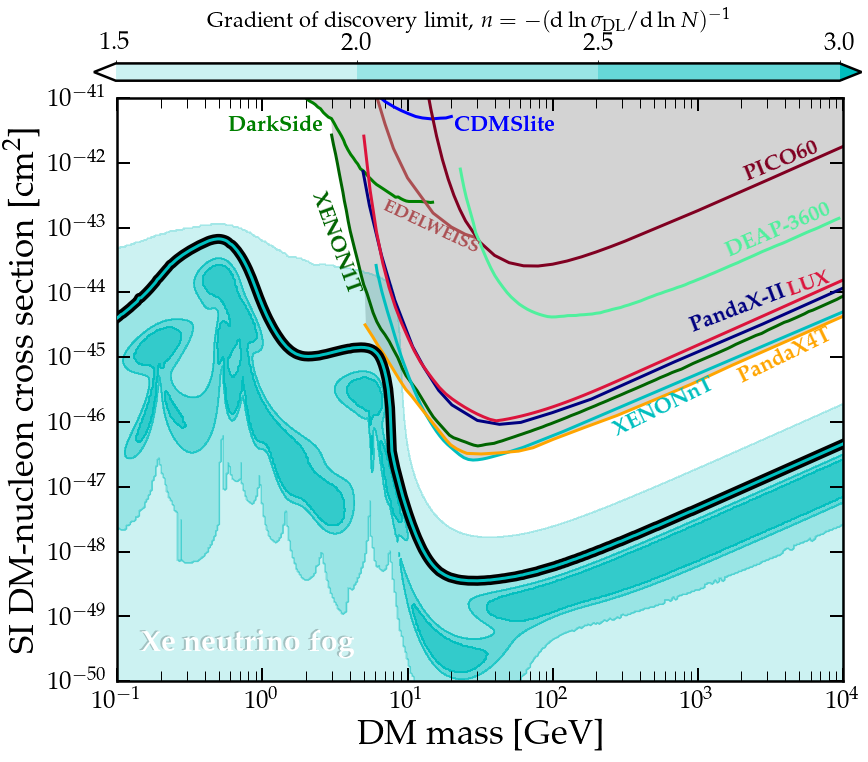

In [10]:
method2P2 = vFogPlot2(res2, m_vals, 'c', 'Xe')

In [11]:
myPathFig = os.path.join(os.path.abspath(os.path.pardir),'plots')
# method1P1.savefig(os.path.join(myPathFig,'method1P1.pdf'),bbox_inches='tight')
# method1P1.savefig(os.path.join(myPathFig,'png','method1P1.png'),bbox_inches='tight')
# method1P2.savefig(os.path.join(myPathFig,'method1P2.pdf'),bbox_inches='tight')
# method1P2.savefig(os.path.join(myPathFig,'png','method1P2.png'),bbox_inches='tight')
# method2P1.savefig(os.path.join(myPathFig,'method2P1.pdf'),bbox_inches='tight')
# method2P1.savefig(os.path.join(myPathFig,'png','method2P1.png'),bbox_inches='tight')
method2P2.savefig(os.path.join(myPathFig,'MyNeutrinoFog.pdf'),bbox_inches='tight')
method2P2.savefig(os.path.join(myPathFig,'png','MyNeutrinoFog.png'),bbox_inches='tight')